### PCA ON GENE DATA

Approach - 
The data contains 2 files 

1. The meta data -  which includes the time at which the samples were taken 
2. The gene data -  which includes the name/type of the gene and its values for the 30 samples that were taken during different time.

### One major output/question ?
####  Does time impact the value of the genes.
    
### Task 
Perform PCA

Plot scatter plots for PC1,PC2 and contribution vector plots.

#### STEPS -

Understand the data.

Perform Basic analysis.

Apply PCA, check contribution

Scatter plots

Vector plot.

IF required check for correlations

#### Importing libraries

In [44]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

#### reading the data

In [45]:

df = pd.read_csv('Assignment-gene_data.csv')
df = df.drop('Unnamed: 0',axis=1)
df = df.convert_objects(convert_numeric=True)
md = pd.read_csv('Assignment-Meta_data sheet.csv')


/home/tanishk/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/tanishk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22411 entries, 0 to 22410
Data columns (total 31 columns):
symbol    22411 non-null object
S1        22411 non-null float64
S2        22410 non-null float64
S3        22411 non-null float64
S4        22411 non-null float64
S5        22411 non-null float64
S6        22411 non-null float64
S7        22411 non-null float64
S8        22411 non-null float64
S9        22411 non-null float64
S10       22411 non-null float64
S11       22411 non-null float64
S12       22411 non-null float64
S13       22410 non-null float64
S14       22411 non-null float64
S15       22411 non-null float64
S16       22411 non-null float64
S17       22411 non-null float64
S18       22411 non-null float64
S19       22411 non-null float64
S20       22411 non-null float64
S21       22410 non-null float64
S22       22411 non-null float64
S23       22411 non-null float64
S24       22411 non-null float64
S25       22411 non-null float64
S26       22411 non-null float64
S

In [47]:

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.set_index('symbol' , inplace=True) 

In [34]:
# importing and initalizing
from sklearn.decomposition import PCA
pca = PCA()


In [35]:
# importing standard scaler for scaling data
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df)

In [36]:
data_pca = pd.DataFrame(pca.fit_transform(df_std))

### Scatter plot

<IPython.core.display.Javascript object>


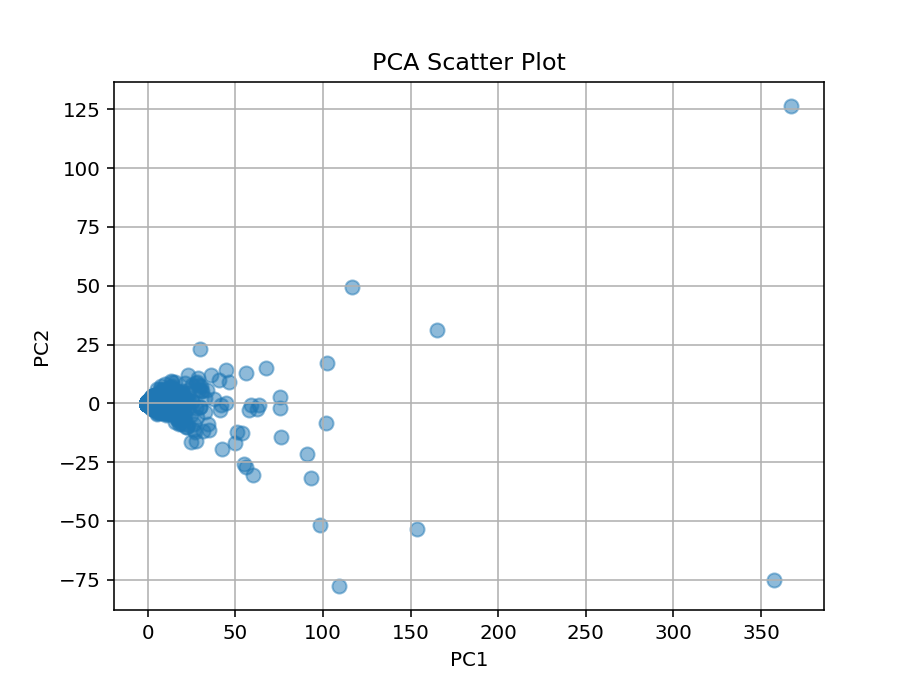

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Scatter Plot')

ax.scatter(data_pca[0] , data_pca[1] , s = 50 , alpha=0.5)
ax.grid()

### Explained Variance Ratio

In [10]:
for i in pca.explained_variance_ratio_[:5]:
    print(i *100)

80.98446468797792
7.4587817165502255
4.6413492604073285
3.317918209183431
1.052412802519157


It is easier to observe here that there are heavily correlated columns, that provide support to PC1, as the variance ratio is a whooping 80%, and rest of the components have a very low value of the same metric

### CONTRIBUION PLOT

The contribution plot will help us understand which of the features impacts the data, it will also help us know what are the features which are correlated.

<IPython.core.display.Javascript object>


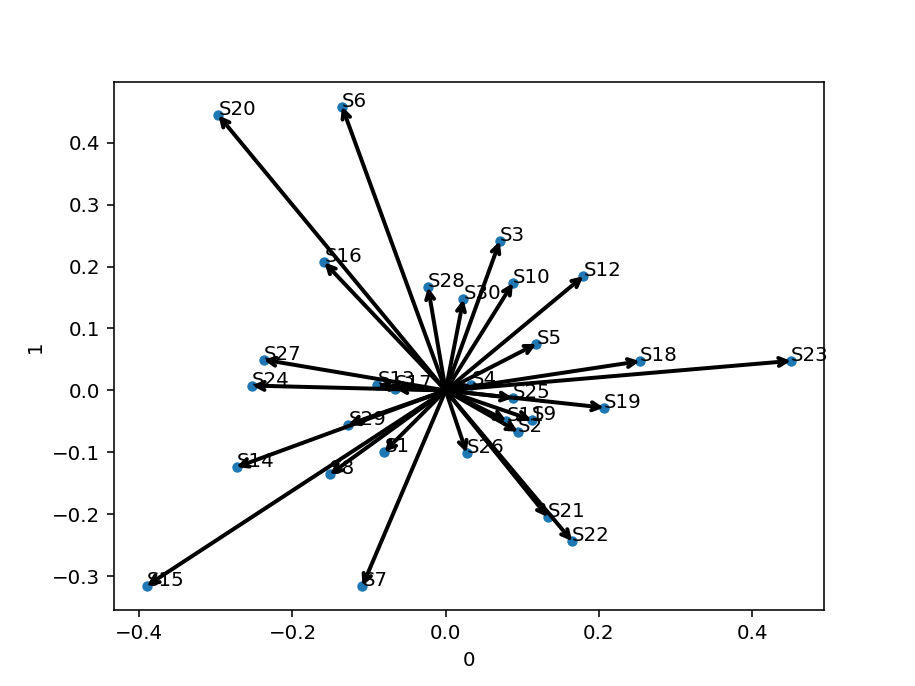

In [38]:
data_comp = pd.DataFrame(pca.components_)
def draw_vector(v0, v1,ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', (r[1][0],r[1][1]), (0,0), arrowprops=arrowprops)
    ax.annotate(s, (r[1][0],r[1][1]), (r[1][0],r[1][1]),)

# plot data

plt.figure()
ax = sns.scatterplot(data_comp[0],data_comp[1])
for r,s in zip(data_comp.iterrows(),md['sIdx'] ):
    #v = data_eigen_vector * 3 * np.sqrt(length)
    draw_vector(r, s)


To have a better view of the same we can group these according to time that they were taken at. This will help us understand what impact does time have on the gene data

So we divide the group on 3 hour time line

In [39]:
conditions = [
    (md['Time'] >=0) & (md['Time'] <2),
    (md['Time'] >=2) & (md['Time'] <4),
    (md['Time'] >=4) & (md['Time'] <6),
    (md['Time'] >=6) & (md['Time'] <8),
    (md['Time'] >=8) & (md['Time'] <10),
    (md['Time'] >=10) & (md['Time'] <=12),

]

choices = [1,2,3,4,5,6]

md['seg'] = np.select(conditions, choices, default= np.nan)

In [40]:
cd = {4: 'c', 3: 'g', 2: 'r', 1: 'b', 5: 'm', 6: 'y'}

In [41]:
cmap = []
for b in md['seg']:
    cmap.append(cd[b])



<IPython.core.display.Javascript object>


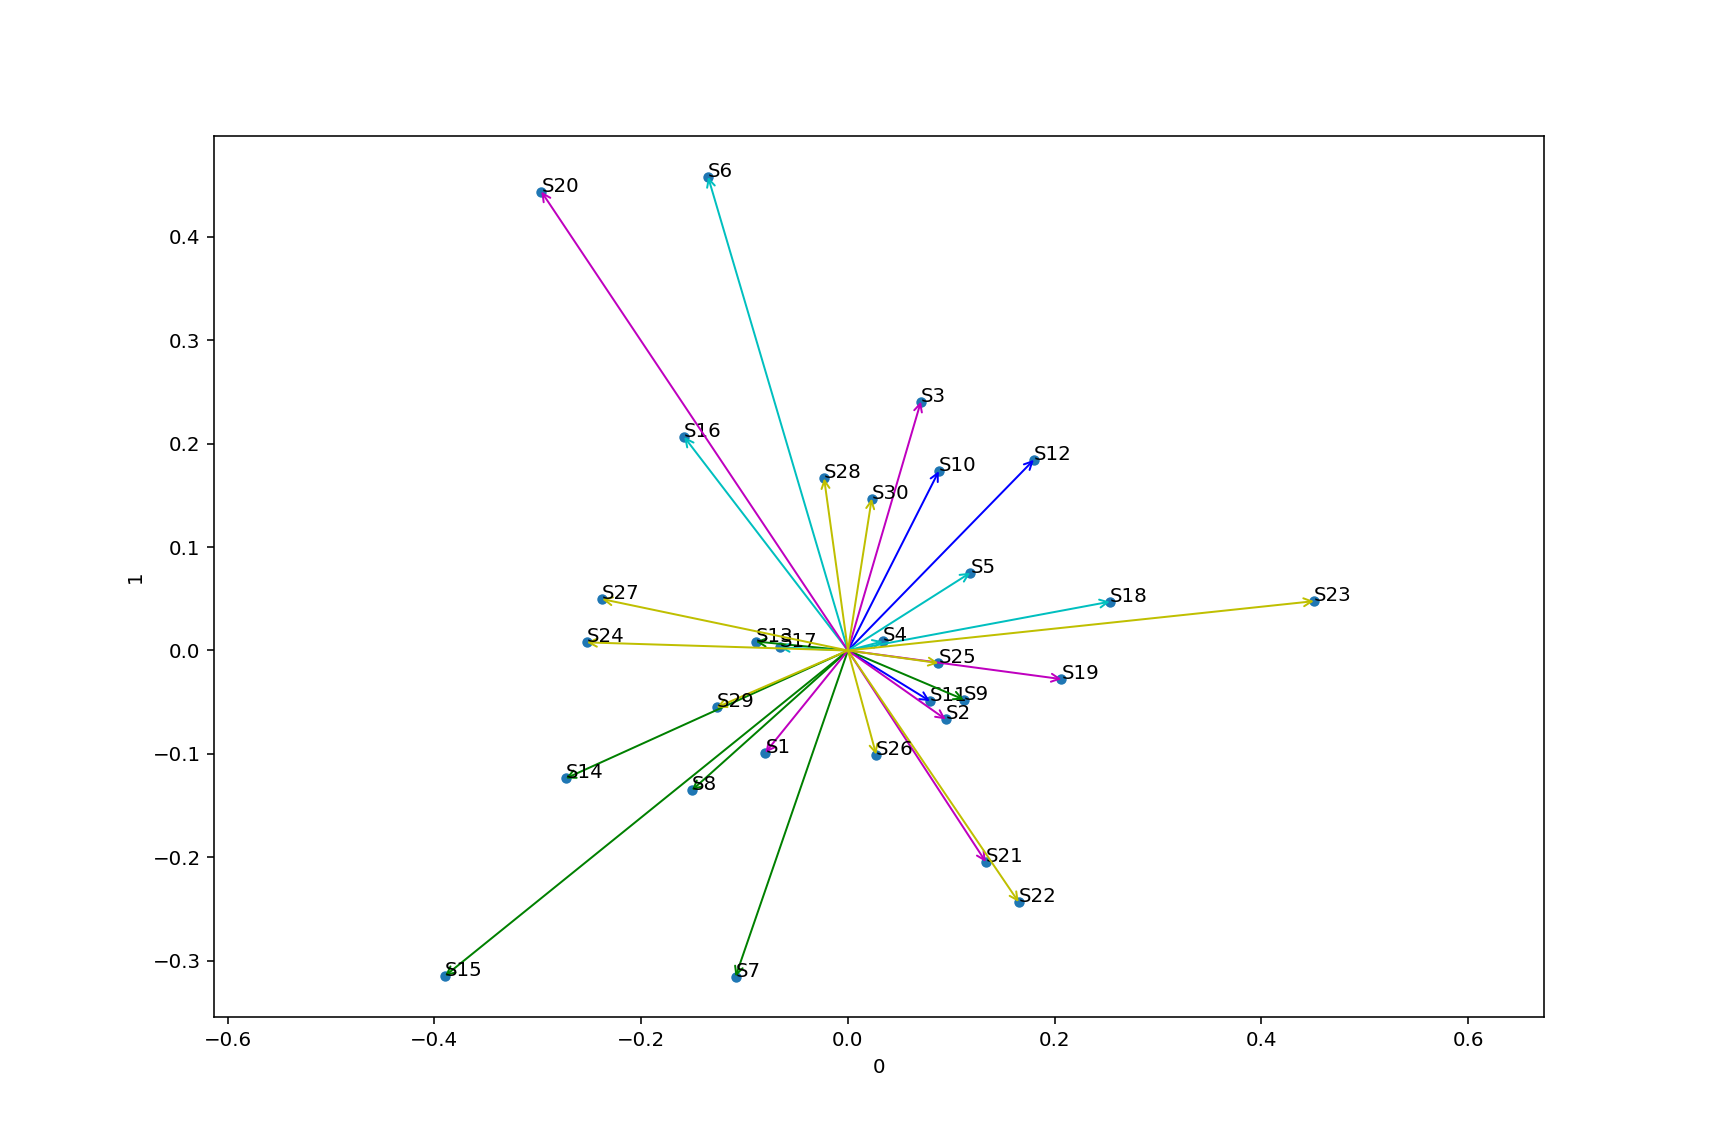

In [42]:
data_comp = pd.DataFrame(pca.components_)
def draw_vector(v0, v1, c ,ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=1,
                    color = c,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', (r[1][0],r[1][1]), (0,0), arrowprops=arrowprops)
    ax.annotate(s, (r[1][0],r[1][1]), (r[1][0],r[1][1]),)

# plot data

plt.figure(figsize=(12,8))
ax = sns.scatterplot(data_comp[0],data_comp[1])
for r,s,i in zip(data_comp.iterrows(),md['sIdx'] , cmap):
    #v = data_eigen_vector * 3 * np.sqrt(length)
    draw_vector(r, s, i)
plt.axis('equal');

Thus we can see that there is a noticeable impact of time, wherein the initial samples there is a difference and quite a variance as the gene shows an ON and OFF behavior like it does in a CELL.
This can be noticed in the Blue and green vectors that are far apart from each other. Thus stating that time has an effect on the values of the genes.
On the other hand, a lot of these vector groups are correlated to each other which we earlier saw in the variance explained by PC1

We can also plot a correlation graph to see the correlation with TIME. 

<IPython.core.display.Javascript object>


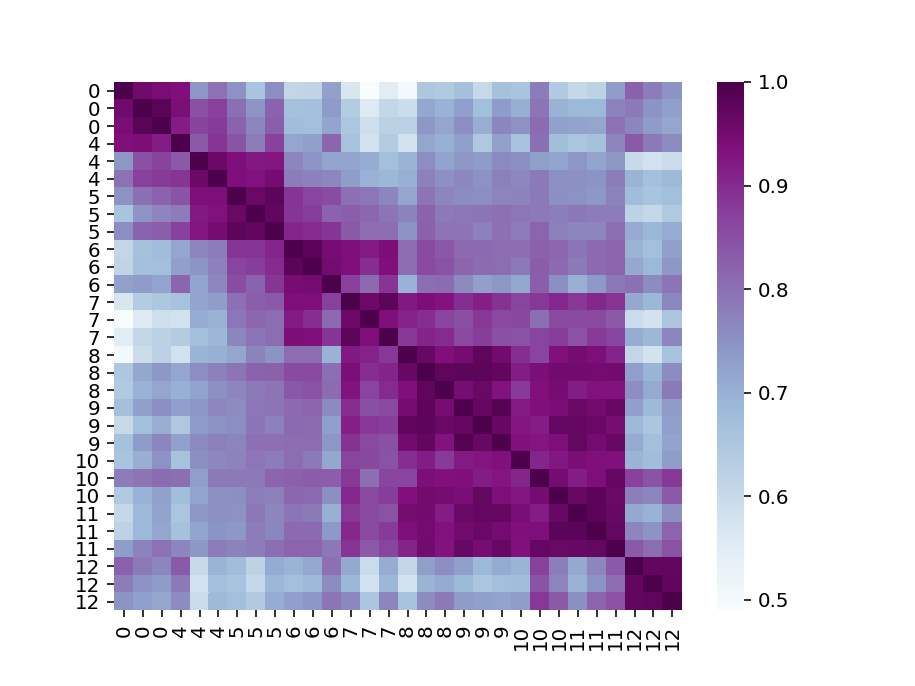

In [48]:
data_corr = df.corr()
md = md.sort_values(by="Time")
df = df[md.sIdx]
plt.figure()
sns.heatmap(data_corr,cmap='BuPu',yticklabels=md.Time,xticklabels=md.Time)
plt.show()

Ref:
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/
    